# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# import Dependencies
import os as os
import csv as csv
import pandas as pd
import numpy as np
import scipy as sts
import json
import gmaps
import requests
from datetime import date
import random as rd
from matplotlib import pyplot as plt
from scipy.stats import linregress 
from sklearn import datasets
from pprint import pprint
from citipy import citipy
from config import (weather_api_key, g_key)


## Generate Cities List

In [55]:
# Create and empty list for name of cities to be stored
city_list = []

# Create loop so that the length of the list iterates to set number (number is set high due to duplicates)
while len(city_list) < 1300:
    
    #set random lat and long for full range
    latitude = rd.uniform(-90.0,90.0)
    longitude = rd.uniform(-180.0,180.0)
    
    # Using citipy.nearest_city with lat and lng parameters to get city_name
    cities = citipy.nearest_city(latitude,longitude).city_name
    
    # Append returned cities to empty city_list
    city_list.append(cities)
    
# Get len of city_list to assure we have enough data
len(city_list)

1300

In [56]:
# Create a dataframe from city_list. Check for unique number.
city_list_df = pd.DataFrame({"City": city_list})

# drop_duplicates
city_list_df = city_list_df.drop_duplicates()

#confirm unique count is over 500
city_list_df.describe()

,City
count,560
unique,560
top,teguise
freq,1


In [57]:
# Add column names to dataframe
city_list_df['Lat'] = ""
city_list_df['Lng'] = ""
city_list_df['Max Temp.'] = ""
city_list_df['Humidity (%)'] = ""
city_list_df['Cloudiness (%)'] = ""
city_list_df['Wind Speed (mph)'] = ""
city_list_df["Country"] = ""
city_list_df["Date"] = ""

# Display dataframe
city_list_df.head()

,City,Lat,Lng,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,shakhtinsk,,,,,,,,
1,khatanga,,,,,,,,
2,milkovo,,,,,,,,
3,bambous virieux,,,,,,,,
4,kegayli,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# openweathermap endpoint
url = "http://api.openweathermap.org/data/2.5/weather?"

# Identify unit as imperial to retrive fahrenheint temp
unit = "imperial"

# Create list for data that will be retrived from API
city_name = []
lat = []
lng =[]
temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []

# Use for loop to iterate on each city from city_list
for city in city_list_df["City"]:
    
    # Wrap for loop in try statement so that we can use except statement for any city that has missing data
    try:
        # Create query_url with url , weather_api_key and city fro for loop
        query_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
        
        # Print results
        print(f"Retrieving Results for {city}")
        
        # Get response with request.get with query_url parameter and .json() 
        response = requests.get(query_url).json()    
                  
        # Append results to set lists above by identifying location from response
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    # except statement to address any cities with missing data so that the program continues and we can track such cities
    except (KeyError, IndexError):
        print("Missing field/results... skipping")
    print("---------------------------------------")
print("Data Retrival Completed")
print("---------------------------------") 


Retrieving Results for shakhtinsk
---------------------------------------
Retrieving Results for khatanga
---------------------------------------
Retrieving Results for milkovo
---------------------------------------
Retrieving Results for bambous virieux
---------------------------------------
Retrieving Results for kegayli
Missing field/results... skipping
---------------------------------------
Retrieving Results for sinkat
Missing field/results... skipping
---------------------------------------
Retrieving Results for adrar
---------------------------------------
Retrieving Results for cockburn town
---------------------------------------
Retrieving Results for grand river south east
Missing field/results... skipping
---------------------------------------
Retrieving Results for batagay-alyta
---------------------------------------
Retrieving Results for gornopravdinsk
---------------------------------------
Retrieving Results for barentsburg
Missing field/results... skipping
-----

---------------------------------------
Retrieving Results for port alfred
---------------------------------------
Retrieving Results for tinskoy
---------------------------------------
Retrieving Results for bubaque
---------------------------------------
Retrieving Results for shubarshi
---------------------------------------
Retrieving Results for bredasdorp
---------------------------------------
Retrieving Results for dikson
---------------------------------------
Retrieving Results for bereda
---------------------------------------
Retrieving Results for narsingi
---------------------------------------
Retrieving Results for cartagena del chaira
---------------------------------------
Retrieving Results for barawe
Missing field/results... skipping
---------------------------------------
Retrieving Results for algiers
---------------------------------------
Retrieving Results for zambezi
---------------------------------------
Retrieving Results for ust-nera
----------------------

Missing field/results... skipping
---------------------------------------
Retrieving Results for ozgon
Missing field/results... skipping
---------------------------------------
Retrieving Results for port elizabeth
---------------------------------------
Retrieving Results for saldanha
---------------------------------------
Retrieving Results for biak
---------------------------------------
Retrieving Results for esperance
---------------------------------------
Retrieving Results for fecamp
---------------------------------------
Retrieving Results for oak ridge
---------------------------------------
Retrieving Results for east london
---------------------------------------
Retrieving Results for asyut
---------------------------------------
Retrieving Results for sao filipe
---------------------------------------
Retrieving Results for bokspits
Missing field/results... skipping
---------------------------------------
Retrieving Results for polonnaruwa
------------------------------

---------------------------------------
Retrieving Results for ivaipora
---------------------------------------
Retrieving Results for luang prabang
---------------------------------------
Retrieving Results for vila velha
---------------------------------------
Retrieving Results for tuskegee
---------------------------------------
Retrieving Results for swinoujscie
---------------------------------------
Retrieving Results for fairbanks
---------------------------------------
Retrieving Results for monte patria
---------------------------------------
Retrieving Results for hambantota
---------------------------------------
Retrieving Results for elbrus
---------------------------------------
Retrieving Results for robertsport
---------------------------------------
Retrieving Results for zhigansk
---------------------------------------
Retrieving Results for alexandria
---------------------------------------
Retrieving Results for caravelas
---------------------------------------
Ret

---------------------------------------
Retrieving Results for kwinana
---------------------------------------
Retrieving Results for azare
---------------------------------------
Retrieving Results for gasa
---------------------------------------
Retrieving Results for mazatlan
---------------------------------------
Retrieving Results for umea
---------------------------------------
Retrieving Results for eureka
---------------------------------------
Retrieving Results for attawapiskat
Missing field/results... skipping
---------------------------------------
Retrieving Results for urengoy
---------------------------------------
Retrieving Results for kargasok
---------------------------------------
Retrieving Results for chilliwack
---------------------------------------
Data Retrival Completed
---------------------------------


In [72]:
# Create dictionary with retrieved data for dataframe
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp. (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
}
# Create dataframe
city_df = pd.DataFrame(city_dict)
#city_df["City"].describe()

# Used .map to format results. Need more time to figure out how to convert the date. 
# had issue with dtype I know I can covert to float or int64 but let as is
#city_df["Humidity (%)"] = city_df["Humidity (%)"].map("{:.2f}%".format)
#city_df["Cloudiness (%)"] = city_df["Cloudiness (%)"].map("{:.2f}%".format)
#city_df["Date"] = city_df["Date"]

# Display dataframe
city_df.head()

,City,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Shakhtinsk,49.71,72.59,33.80,43,33,8.95,KZ,1603125274
1,Khatanga,71.97,102.50,9.48,95,38,4.88,RU,1603125274
2,Mil'kovo,54.72,158.62,33.13,91,88,5.26,RU,1603125274
3,Bambous Virieux,-20.34,57.76,75.20,73,40,8.05,MU,1603125159
4,Adrar,20.50,-10.07,92.89,13,0,14.97,MR,1603125275


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
# Export dataframe to csv
city_df.to_csv("../Output/city_data.csv")

In [77]:
# Display dataframe
city_df.head()

,City,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Shakhtinsk,49.71,72.59,33.80,43,33,8.95,KZ,1603125274
1,Khatanga,71.97,102.50,9.48,95,38,4.88,RU,1603125274
2,Mil'kovo,54.72,158.62,33.13,91,88,5.26,RU,1603125274
3,Bambous Virieux,-20.34,57.76,75.20,73,40,8.05,MU,1603125159
4,Adrar,20.50,-10.07,92.89,13,0,14.97,MR,1603125275


In [78]:
city_df.describe()

,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,20.225300,13.839671,62.105377,70.493230,53.106383,8.327640,1.603125e+09
std,33.376253,89.231840,21.790473,21.627001,36.695509,5.544685,1.004242e+02
min,-54.800000,-175.200000,3.160000,10.000000,0.000000,0.180000,1.603125e+09
25%,-7.200000,-63.000000,46.400000,59.000000,20.000000,4.430000,1.603125e+09
50%,22.890000,15.800000,66.990000,75.000000,60.000000,6.980000,1.603125e+09
75%,49.580000,88.170000,79.380000,87.000000,90.000000,11.180000,1.603125e+09
max,78.220000,179.320000,104.700000,100.000000,100.000000,35.460000,1.603125e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
# create a series to check to seee if any cities are over 100% humidity
high_humidity = city_df["Humidity (%)"] > 100

# Get value_counts() to see if any cities came back True
high_humidity.count()

517

In [84]:
city_df.describe()

,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,20.225300,13.839671,62.105377,70.493230,53.106383,8.327640,1.603125e+09
std,33.376253,89.231840,21.790473,21.627001,36.695509,5.544685,1.004242e+02
min,-54.800000,-175.200000,3.160000,10.000000,0.000000,0.180000,1.603125e+09
25%,-7.200000,-63.000000,46.400000,59.000000,20.000000,4.430000,1.603125e+09
50%,22.890000,15.800000,66.990000,75.000000,60.000000,6.980000,1.603125e+09
75%,49.580000,88.170000,79.380000,87.000000,90.000000,11.180000,1.603125e+09
max,78.220000,179.320000,104.700000,100.000000,100.000000,35.460000,1.603125e+09


In [85]:
#  Get the indices of cities that have humidity over 100%.
# No cities over 100% humidity


In [86]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

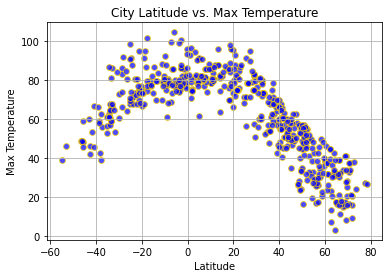

In [87]:
# Create scatter plot for latitude vs temp
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Add grid
plt.grid()

# save scatter plot to png
plt.savefig("../Images/lat_temp_png")

## Latitude vs. Humidity Plot

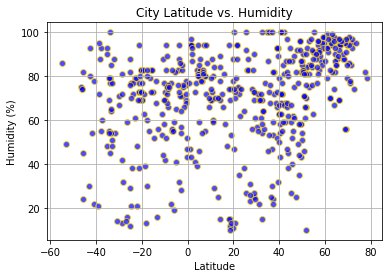

In [88]:
# Create scatter plot for lat vs humidity
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assgin labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# save scatter plot to png
plt.savefig("../Images/lat_humidity_png")

## Latitude vs. Cloudiness Plot

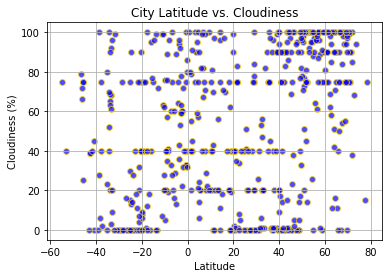

In [89]:
# Create scatter plot for lat vs cloudiness
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# save scatter plot to png
plt.savefig("../Images/lat_cloudiness_png")

## Latitude vs. Wind Speed Plot

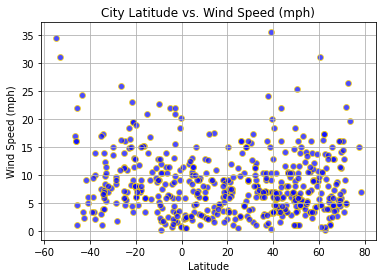

In [90]:
# Create scatter plot for lat vs. wind speed
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# save scatter plot to png
plt.savefig("../Images/lat_wind_speed_png")

## Linear Regression

In [91]:
# Cretate a dataframe for only the northern hemisphere by identifying lat >= 0 
northern_hemisphere_df = pd.DataFrame(city_df[city_df.Lat >= 0])

# Save to csv
northern_hemisphere_df.to_csv("../Output/northern_hemisphere.csv")

# Display
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Shakhtinsk,49.71,72.59,33.80,43,33,8.95,KZ,1603125274
1,Khatanga,71.97,102.50,9.48,95,38,4.88,RU,1603125274
2,Mil'kovo,54.72,158.62,33.13,91,88,5.26,RU,1603125274
4,Adrar,20.50,-10.07,92.89,13,0,14.97,MR,1603125275
5,Cockburn Town,21.46,-71.14,81.93,74,83,11.97,TC,1603125275


In [92]:
# Create dataframe for only the southern hemisphere by identifying lat <= 0
southern_hemisphere_df = pd.DataFrame(city_df[city_df.Lat <= 0])

# Save to csv
southern_hemisphere_df.to_csv("../Output/sourthern_hemisphere.csv")

#Display
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
3,Bambous Virieux,-20.34,57.76,75.20,73,40,8.05,MU,1603125159
8,Busselton,-33.65,115.33,59.00,64,3,9.86,AU,1603125276
12,Lebu,-37.62,-73.65,56.25,60,2,9.95,CL,1603125012
13,Faanui,-16.48,-151.75,79.79,79,0,15.21,PF,1603125277
19,New Norfolk,-42.78,147.06,42.01,80,39,2.33,AU,1603125279


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

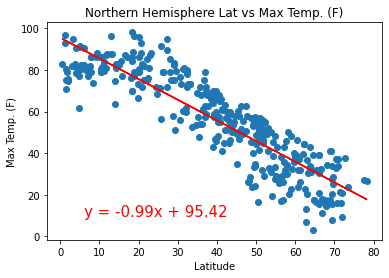

<Figure size 432x288 with 0 Axes>

In [175]:
# Set x and y values from northern_hemisphere_df to extract from lat and max temp 
x_values =  northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Max Temp. (F)"]

# Create scatter plot with linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assgin labels
plt.title("Northern Hemisphere Lat vs Max Temp. (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp. (F)')

# Retrive r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/north_hem_max_temp.png")

## Northern Hemisphere Lat vs Max Temp (F)

Result:

The r-squared is 0.79.

Analysis:

Based on Pearson's correlation, with a result of 0.7, we can state that there is a strong correlation between 
the location of a city in the Northern hemisphere and the distance from the equator that affect high temperatures. 
As we can see on in this scatter plot, the closer to the equator, the hotter the temperature, and the further away 
from the equator, the cooler the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

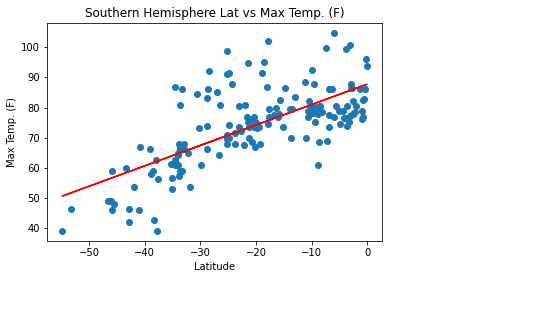

<Figure size 432x288 with 0 Axes>

In [176]:
# Create x and y values from southern_hemishphere_df to extract from lat and max temp 
x_values =  southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Max Temp. (F)"]

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Southern Hemisphere Lat vs Max Temp. (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp. (F)')

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plots as png
plt.savefig("../Images/south_hem_max_temp.png")

## Southern Hemisphere Lat vs Max Temp (F)

Results: 

The r-squared is 0.48

Analysis:

Based on Pearson’s correlation, with a result of 0.4, we can state that there is a weak correlation between the 
location of a city in the southern hemisphere and the distance from the equator that affect high temperatures. 
Afterreviewing the scatter plot, it appears the southern hemisphere is hotter. There is a trend that the 
temperatures rise as it gets closer to the equator, however, some cities peak at high temps before reaching the 
equator. As a result, it’s much hotter in the southern hemisphere 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

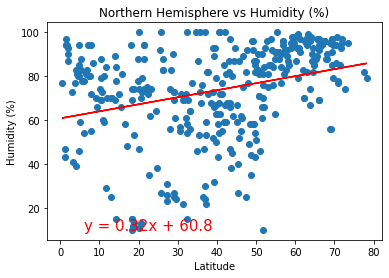

<Figure size 432x288 with 0 Axes>

In [177]:
# Set x and y values from northern_hemisphere_df to extract from lat and humidity 
x_values =  northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Humidity (%)"]

# Create scatter plot and linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assgin labels
plt.title("Northern Hemisphere vs Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/north_hem_humidity.png")

## Northern Hemisphere vs Humidity (%)

Results: 

The r-squared is 0.09

Analysis:

Based on Pearson’s correlation, with a result of 0.09, we can state that there is no correlation when it comes
to the humidity of a city in the northern hemisphere and the distance from the equator. As we can see in this 
scatter plot, the data is spread. If anything, we see that the humidity tends to be high in the northern hemisphere
and increased the further away from the equator, but it is not consistent enough.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

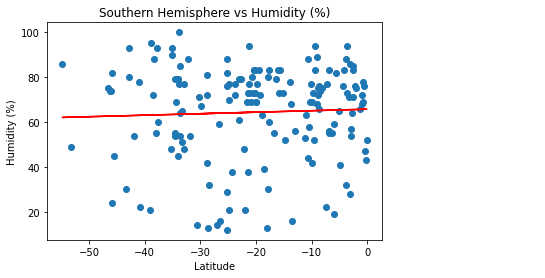

<Figure size 432x288 with 0 Axes>

In [178]:
# Set x and y values from southern_hemisphere df to extract from lat and humidity
x_values =  southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Humidity (%)"]

# Create scatter plot and linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Southern Hemisphere vs Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/south_hem_humidity.png")

## Southern Hemisphere vs Humidity (%)

Results: 

Teh r-squares is 0.00

Analysis: 

Based on the Pearson’s correlation, with a result of 0.00, we can state that there is zero correlation 
between a cities location in the southern hemisphere and the distance for the equator in relation to the 
level of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

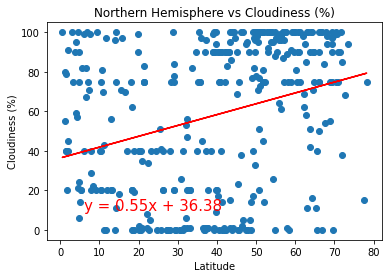

<Figure size 432x288 with 0 Axes>

In [179]:
# Set x and y values from northern_hemisphere_df to extract from lat and cloudiness
x_values =  northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Cloudiness (%)"]

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Assign labels
plt.title("Northern Hemisphere vs Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Retrive r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")


# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/north_hem_cloudiness.png")

## Northern Hemisphere vs Cloudiness (%)

Results:

The r-squared is 0.09

Analysis:

Based on the Pearson’s correlation, with a result of 0.09, we can state that there is a weak correlation 
between a cities location in the northen hemisphere and the distance for the equator in relation to the 
level of cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

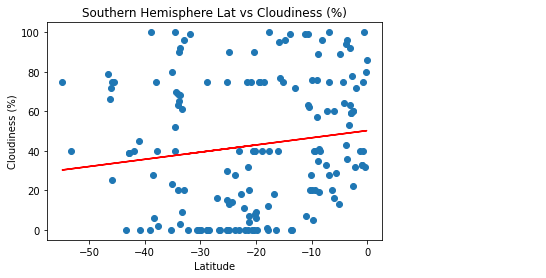

<Figure size 432x288 with 0 Axes>

In [180]:
# Set x and y values from southern_hemisphere_df to extract from lat and cloudiness
x_values =  southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Cloudiness (%)"]

# Create a scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Southern Hemisphere Lat vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display 
plt.show()

# Save scatter plot as png
plt.savefig("../Images/south_hem_cloudiness.png")

## Southern Hemisphere LAt vs Cloudiness (%)

Results:

The r-squared is 0.02

Analysis:

Based on the Pearson’s correlation, with a result of 0.02, we can state that there is a weak correlation 
between a cities location in the southern hemisphere and the distance for the equator in relation to the 
level of cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

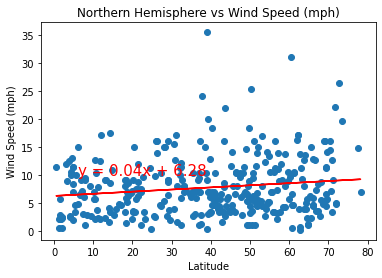

<Figure size 432x288 with 0 Axes>

In [181]:
# Set x and y values from northern_hemisphere_df to extract from lat and wind speed
x_values =  northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Wind Speed (mph)"]

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Northern Hemisphere vs Wind Speed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/north_hem_wind_speed.png")

## Northern Hemisphere vs Wind Speed (mph)

Results:

The r-squared is 0.02

Analysis:

Based on Pearson’s correlation, with a result of 0.02, we can state that there is a weak correlation 
between the location of a city in the northern hemisphere and the distance from the equator when it comes 
to the affects on wind speed. After reviewing the scatter plot, we can see that wind speeds tend to be low 
throughout with a few random peaks after 30 degrees

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

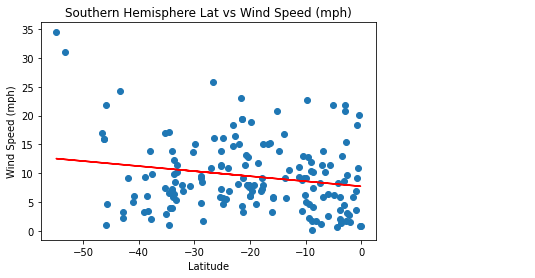

<Figure size 432x288 with 0 Axes>

In [182]:
# Set x and y values from southern_hemisphere to extraxt from lat and wind speed
x_values =  southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Wind Speed (mph)"]

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Southern Hemisphere Lat vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("../Images/south_hem_wind_speed.png")

## Southern Hemisphere Lat vs Wind Speed (mph)

Results:

The r-squared is 0.03

Analysis:

Based on Pearson’s correlation, with a result of 0.02, we can state that there is a weak correlation 
between the location of a city in the southern hemisphere and the distance from the equator when it comes 
to the effect on wind speed.